In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
from sklearn import preprocessing
from sklearn.cluster import KMeans
sys.path.insert(0, "../scripts/")
%matplotlib inline

In [2]:
clean_df=pd.read_csv("../data/clean_user_info.csv")

In [3]:
clean_df.drop(["Unnamed: 0"],axis=1,inplace=True)

since the aggregation was done and saved, we just need to import it

In [4]:
clean_df=clean_df[["MSISDN/Number","Bearer Id","Duration in Minutes","Total UL/DL"]]
clean_df.head()

,MSISDN/Number,Bearer Id,Duration in Minutes,Total UL/DL
0,3.360100e+10,1,116720.0,0.878691
1,3.360100e+10,1,181230.0,0.156860
2,3.360100e+10,1,134969.0,0.595966
3,3.360101e+10,1,49878.0,0.422321
4,3.360101e+10,2,37104.0,1.457411


In [5]:
frequency_top10=clean_df[["MSISDN/Number","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)[:10].reset_index(drop=True)
frequency_top10

,MSISDN/Number,Bearer Id
0,3.362632e+10,18
1,3.362578e+10,17
2,3.361489e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.362708e+10,12
8,3.360452e+10,12
9,3.376041e+10,12


In [6]:
duration_top10 = (
    clean_df[["MSISDN/Number", "Duration in Minutes"]]
    .sort_values(by="Duration in Minutes", ascending=False)[:10]
    .reset_index(drop=True)
)
duration_top10


,MSISDN/Number,Duration in Minutes
0,3.362578e+10,18553754.0
1,3.361489e+10,9966898.0
2,3.376054e+10,9279434.0
3,3.362632e+10,8791927.0
4,3.366716e+10,8744914.0
5,3.366284e+10,6614270.0
6,3.366469e+10,6288730.0
7,3.360313e+10,6287761.0
8,3.366746e+10,5649882.0
9,3.376041e+10,5321667.0


In [16]:
trafic_top10 = (
    clean_df[["MSISDN/Number", "Total UL/DL"]]
    .sort_values(by="Total UL/DL", ascending=False)[:10]
    .reset_index(drop=True)
)
trafic_top10


,MSISDN/Number,Total UL/DL
0,3.361489e+10,8.846226
1,3.376054e+10,8.514774
2,3.362578e+10,8.499621
3,3.362632e+10,7.971167
4,3.367588e+10,7.891111
5,3.365973e+10,7.705863
6,3.366646e+10,7.308501
7,3.376041e+10,7.132371
8,3.366471e+10,6.872018
9,3.369879e+10,6.540899


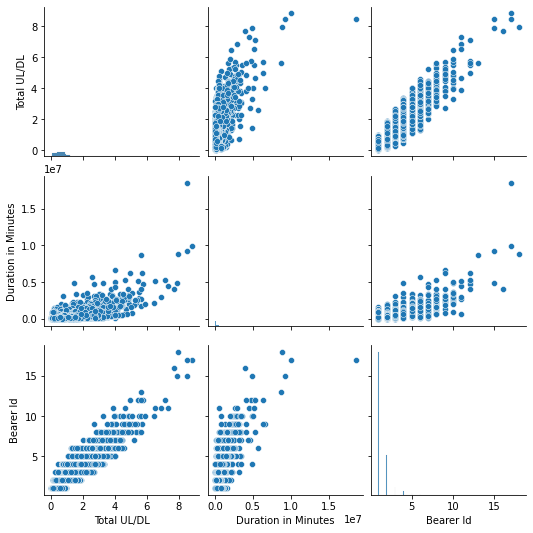

In [8]:
sns.pairplot(clean_df[["Total UL/DL", "Duration in Minutes", "Bearer Id"]])


In [15]:
new_Df = clean_df.drop(["MSISDN/Number"],axis=1)
scaled_data = preprocessing.StandardScaler().fit_transform(new_Df)

new_df = pd.DataFrame(scaled_data, columns=clean_df.drop(["MSISDN/Number"],axis=1).columns)


new_df.describe()


,Bearer Id,Duration in Minutes,Total UL/DL
count,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.046637e-16,5.990400e-17,3.723740e-16
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.885642e-01,-7.460120e-01,-1.339392e+00
25%,-4.885642e-01,-4.016959e-01,-6.769367e-01
50%,-4.885642e-01,-2.330311e-01,-1.487393e-01
75%,7.521026e-01,1.429071e-01,3.390120e-01
max,2.060277e+01,9.877551e+01,1.660769e+01


In [16]:
from scipy.spatial.distance import cdist


In [22]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)

    distortions.append(
        sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, "euclidean"), axis=1))
        / scaled_data.shape[0]
    )
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = (
        sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, "euclidean"), axis=1))
        / scaled_data.shape[0]
    )
    mapping2[k] = kmeanModel.inertia_


In [23]:
for key, val in mapping1.items():
    print(f"{key} : {val}")


1 : 1.204437515376581
2 : 0.8807103467945526
3 : 0.735570932551501
4 : 0.7062199914932915
5 : 0.5798585614465309
6 : 0.56931850110341
7 : 0.5407931744080501
8 : 0.5054268720183066
9 : 0.5005085083963657


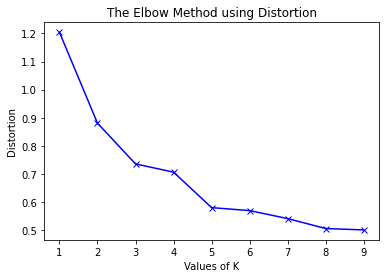

In [80]:
plt.plot(K, distortions, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("The Elbow Method using Distortion")
plt.show()


Using the elbow method using 3 clusturs is the most appropraite

In [81]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(new_df)

clus_df = pd.DataFrame(new_df)
clus_df["clusters"] = pred_y
clus_df


,Bearer Id,Duration in Minutes,Total UL/DL,clusters
0,-0.488564,-0.158014,0.382297,2
1,-0.488564,0.188148,-1.087666,2
2,-0.488564,-0.060090,-0.193453,2
3,-0.488564,-0.516690,-0.547071,2
4,0.752103,-0.585235,1.560825,1
...,...,...,...,...
106851,-0.488564,-0.737061,0.048222,2
106852,-0.488564,-0.027791,-0.428985,2
106853,-0.488564,3.923731,-0.934395,2
106854,-0.488564,0.573428,-0.192798,2


In [82]:
clus_df.groupby("clusters")["Bearer Id"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,5158.0,3.250273,1.490100,0.752103,1.992769,3.233436,4.474103,20.602771
1,22716.0,0.884274,0.411280,-0.488564,0.752103,0.752103,0.752103,3.233436
2,78982.0,-0.466588,0.163652,-0.488564,-0.488564,-0.488564,-0.488564,0.752103


In [44]:
clus_df.groupby("clusters")["Duration in Minutes"].describe()


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,4957.0,1.761538,1.374023,-0.426991,1.012449,1.457969,2.037408,10.394209
1,78982.0,-0.233630,0.369245,-0.746012,-0.494570,-0.320712,-0.042819,3.923731
2,22716.0,0.309510,0.669968,-0.686487,-0.162460,0.173110,0.610161,7.658670
3,201.0,13.381899,9.662354,5.922354,8.434548,10.566919,13.909908,98.775512


In [45]:
clus_df.groupby("clusters")["Total UL/DL"].describe()


,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,4957.0,2.756926,1.103584,-0.301447,2.037161,2.596295,3.394147,8.970847
1,78982.0,-0.399934,0.494299,-1.339392,-0.822406,-0.402960,0.025022,0.529064
2,22716.0,0.734622,0.657116,-1.165809,0.242406,0.712571,1.218348,2.735966
3,201.0,6.138556,2.803248,0.106055,4.484443,5.641183,7.416054,16.607687


In [37]:
new=clus_df.groupby("clusters")
new.count()

,Bearer Id,Duration in Minutes,Total UL/DL
clusters,,,
0,4957,4957,4957
1,78982,78982,78982
2,22716,22716,22716
3,201,201,201


In [83]:
kmeans.cluster_centers_


array([[ 3.25027334e+00,  2.21436693e+00,  2.88870314e+00,
        -6.21724894e-15],
       [ 8.84274307e-01,  3.09510039e-01,  7.34622126e-01,
         2.00000000e+00],
       [-4.66588401e-01, -2.33629621e-01, -3.99934251e-01,
         1.00000000e+00]])

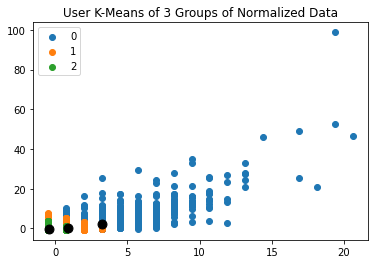

In [84]:
plt.title("User K-Means of 3 Groups of Normalized Data")
for i in np.unique(pred_y):
    plt.scatter(new_df[pred_y == i].iloc[:, 0], new_df[pred_y == i].iloc[:, 1], label=i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, color="black")
plt.legend()
plt.show()


Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [47]:
df = pd.read_csv("../data/clean_user_info.csv")
df

,Unnamed: 0,MSISDN/Number,Bearer Id,Duration in Minutes,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
0,0,3.360100e+10,1,116720.0,0.878691,0.228942,0.021625,0.027181,0.812459,0.004389,0.001331,0.002232,0.386571
1,1,3.360100e+10,1,181230.0,0.156860,0.228942,0.012432,0.011222,0.119750,0.005335,0.003308,0.002661,0.281710
2,2,3.360100e+10,1,134969.0,0.595966,0.228942,0.021334,0.019354,0.538828,0.003443,0.003205,0.003196,0.501694
3,3,3.360101e+10,1,49878.0,0.422321,0.000009,0.006977,0.001942,0.391126,0.009678,0.002285,0.000280,0.035280
4,4,3.360101e+10,2,37104.0,1.457411,0.418884,0.041533,0.049202,1.314798,0.018500,0.003305,0.002913,0.804804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,106851,3.379000e+10,1,8810.0,0.714642,0.000730,0.026648,0.014903,0.660361,0.007531,0.001007,0.000300,0.295283
106852,106852,3.379000e+10,1,140988.0,0.480307,0.228942,0.019852,0.008531,0.437003,0.005430,0.002514,0.000499,0.211115
106853,106853,3.197021e+12,1,877385.0,0.232124,0.228942,0.011960,0.026592,0.178049,0.010439,0.001521,0.000715,0.470526
106854,106854,3.370000e+14,1,253030.0,0.596288,0.228942,0.036735,0.030905,0.510143,0.009831,0.003319,0.000522,0.149188


In [66]:
#youtube
df.sort_values(by="Youtube UL/DL",ascending=False)[["MSISDN/Number","Bearer Id","Duration in Minutes","Youtube UL/DL"]].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Youtube UL/DL
13180,3.362578e+10,17,18553754.0,0.452959
92923,3.376054e+10,15,9279434.0,0.396289
6437,3.361489e+10,17,9966898.0,0.394370
13526,3.362632e+10,18,8791927.0,0.374483
76363,3.367588e+10,15,4865947.0,0.317411
65118,3.366716e+10,13,8744914.0,0.315231
13994,3.362708e+10,12,4703516.0,0.308791
92577,3.376041e+10,12,5321667.0,0.303169
86455,3.369879e+10,11,5169128.0,0.302662
666,3.360313e+10,12,6287761.0,0.284090


In [60]:
df.sort_values(by="Netflix UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Netflix UL/DL"]
].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Netflix UL/DL
37052,3.365973e+10,16,4035428.0,0.399519
6437,3.361489e+10,17,9966898.0,0.361401
13180,3.362578e+10,17,18553754.0,0.356981
92923,3.376054e+10,15,9279434.0,0.334643
13526,3.362632e+10,18,8791927.0,0.328726
92577,3.376041e+10,12,5321667.0,0.318348
65118,3.366716e+10,13,8744914.0,0.313939
76363,3.367588e+10,15,4865947.0,0.309093
106137,3.378632e+10,12,4059652.0,0.305940
94654,3.376127e+10,10,3481629.0,0.292091


In [61]:

df.sort_values(by="Gaming UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Gaming UL/DL"]
].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Gaming UL/DL
6437,3.361489e+10,17,9966898.0,7.749432
92923,3.376054e+10,15,9279434.0,7.461045
13180,3.362578e+10,17,18553754.0,7.326673
76363,3.367588e+10,15,4865947.0,6.970568
13526,3.362632e+10,18,8791927.0,6.887572
37052,3.365973e+10,16,4035428.0,6.725559
63028,3.366646e+10,11,4536757.0,6.646303
92577,3.376041e+10,12,5321667.0,6.268620
57241,3.366471e+10,11,2927785.0,6.103856
86455,3.369879e+10,11,5169128.0,5.753743


In [62]:
df.sort_values(by="Google UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Google UL/DL"]
].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Google UL/DL
13526,3.362632e+10,18,8791927.0,0.152192
13180,3.362578e+10,17,18553754.0,0.142308
6437,3.361489e+10,17,9966898.0,0.127974
92923,3.376054e+10,15,9279434.0,0.123223
37052,3.365973e+10,16,4035428.0,0.116516
106137,3.378632e+10,12,4059652.0,0.110254
76363,3.367588e+10,15,4865947.0,0.109861
65118,3.366716e+10,13,8744914.0,0.105033
94654,3.376127e+10,10,3481629.0,0.097090
86313,3.369876e+10,10,2061185.0,0.091935


In [63]:
df.sort_values(by="Email UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Email UL/DL"]
].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Email UL/DL
13526,3.362632e+10,18,8791927.0,0.042419
6437,3.361489e+10,17,9966898.0,0.040789
13180,3.362578e+10,17,18553754.0,0.040634
106137,3.378632e+10,12,4059652.0,0.036310
37052,3.365973e+10,16,4035428.0,0.036000
92923,3.376054e+10,15,9279434.0,0.033694
76363,3.367588e+10,15,4865947.0,0.031514
60087,3.366546e+10,9,2566292.0,0.030418
65118,3.366716e+10,13,8744914.0,0.030336
86455,3.369879e+10,11,5169128.0,0.029059


In [64]:
df.sort_values(by="Social Media UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Social Media UL/DL"]
].head(10)


,MSISDN/Number,Bearer Id,Duration in Minutes,Social Media UL/DL
13526,3.362632e+10,18,8791927.0,0.043375
92923,3.376054e+10,15,9279434.0,0.039783
37052,3.365973e+10,16,4035428.0,0.035412
6437,3.361489e+10,17,9966898.0,0.028295
13180,3.362578e+10,17,18553754.0,0.027135
65118,3.366716e+10,13,8744914.0,0.024248
106137,3.378632e+10,12,4059652.0,0.023975
70960,3.366907e+10,11,610801.0,0.023801
666,3.360313e+10,12,6287761.0,0.023078
31331,3.365849e+10,9,3061779.0,0.023000


In [74]:
df.sort_values(by="Other UL/DL",ascending=False)[
    ["MSISDN/Number", "Bearer Id", "Duration in Minutes", "Other UL/DL"]
].head(10)

,MSISDN/Number,Bearer Id,Duration in Minutes,Other UL/DL
13526,3.362632e+10,18,8791927.0,8.167878
6437,3.361489e+10,17,9966898.0,7.639264
76363,3.367588e+10,15,4865947.0,6.798515
13180,3.362578e+10,17,18553754.0,6.354583
666,3.360313e+10,12,6287761.0,6.326671
37052,3.365973e+10,16,4035428.0,6.317415
13936,3.362695e+10,10,2415036.0,5.305448
13994,3.362708e+10,12,4703516.0,5.117791
94654,3.376127e+10,10,3481629.0,5.077779
30715,3.365836e+10,10,2131710.0,5.013651


In [87]:
sum_df=df[[ "Other UL/DL", "Social Media UL/DL", "Email UL/DL","Youtube UL/DL", "Netflix UL/DL","Gaming UL/DL","Google UL/DL"]]

In [98]:
sum=sum_df.sum(axis=0)
df_app = pd.DataFrame(
    {"Apps": sum.index, "Total Data": sum.values}
)
to_plot_df=df_app.sort_values(by='Total Data',ascending=False)[:3]

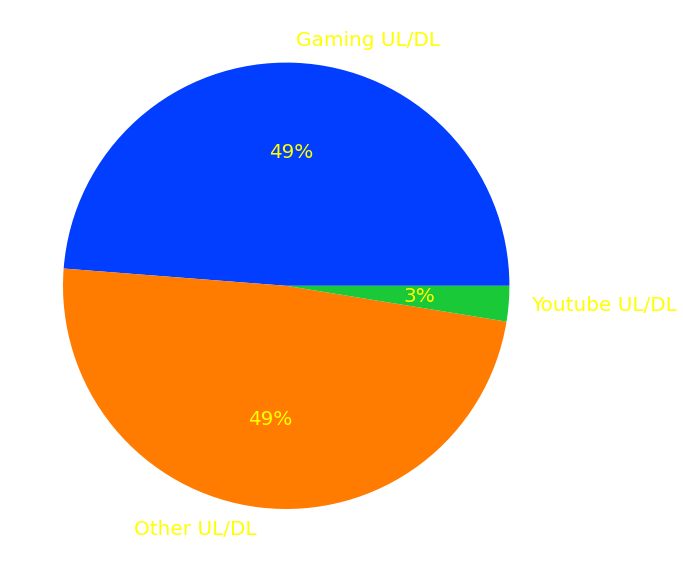

In [107]:

data = to_plot_df["Total Data"].tolist()
labels = ["Gaming UL/DL", "Other UL/DL","Youtube UL/DL"]

# define Seaborn color palette to use
colors = sns.color_palette("bright")

# create pie chart
plt.figure(figsize=(10, 20))
plt.pie(data, labels=labels, colors=colors,textprops = {"color": "yellow", "fontsize": 20}, autopct="%.0f%%")
plt.show()
